# Data set
### NYC MTA Turnstile Usage Dataset
### Link to original dataset - http://web.mta.info/developers/turnstile.html


# Data Analysis

### Load libraries

In [290]:
import pandas as pd
import numpy as np 

## 1. What is the total number of entries & exits across the subway system for August 1, 2017?

In [73]:
df = pd.read_hdf("/data/dscmta-e6/mta_turnstile.h5", where="index == '2017-08-01 00:00:00' or index == '2017-08-02 00:00:00'")

### Calculate entry-exit differences between 2017-08-01 00:00:00 and 2017-08-02 00:00:00, for each ca, scp combination

In [74]:
df['ca_scp'] = df['ca'] + '_' + df['scp']

In [75]:
df['entries_diff'] = df.groupby('ca_scp')['entries'].transform(pd.Series.diff)

In [76]:
df['exits_diff'] = df.groupby('ca_scp')['exits'].transform(pd.Series.diff)

### However, there are some outliers we need to remove - keeping only positive values for the differences

In [79]:
df.loc[df['ca_scp'] == 'N550_01-06-00', :]

,ca,unit,scp,station,linename,division,desc,entries,exits,ca_scp,entries_diff,exits_diff
time,,,,,,,,,,,,
2017-08-01,N550,R242,01-06-00,18 AV,F,IND,REGULAR,891072.0,406019.0,N550_01-06-00,NaN,NaN
2017-08-02,N550,R242,01-06-00,18 AV,F,IND,REGULAR,12.0,1.0,N550_01-06-00,-891060.0,-406018.0


In [81]:
df = df.loc[df['entries_diff'] > 0, :]

In [84]:
df = df.loc[df['exits_diff'] > 0, :]

### Sum of entries and exits to get the final results

In [95]:
print("Total entries: ", df.entries_diff.sum())

Total entries:  3.12778e+06


In [96]:
print("Total exits: ", df.exits_diff.sum())

Total exits:  2.34902e+06


## 2. If we define the "busy-ness" as the sum of entry & exit count, what station was the busiest on August 1, 2017? What turnstile was the busiest on that date?

### 1) Finding the busiest station. 

In [ ]:
df['sum_entry_exit_count'] = df['entries_diff'] + df['exits_diff']

In [ ]:
df['busy_ness_station'] = df.groupby('station')['sum_entry_exit_count'].transform(sum)

In [129]:
df['busy_ness_station'].max()

220008.0

In [128]:
print("Busiest station is: ", df.loc[df['busy_ness_station'] == 220008.0, :].station.unique()[0])

Busiest station is:  34 ST-HERALD SQ


### 2) Finding the busiest turnstile

In [131]:
df.sum_entry_exit_count.max()

13272.0

In [137]:
print("Busiest turnstile is: \n\n", df.loc[df['sum_entry_exit_count'] == 13272.0, :].values)

Busiest turnstile is: 

 [['R238' 'R046' '00-03-02' 'GRD CNTRL-42 ST' '4567S' 'IRT' 'REGULAR'
  86000.0 16084.0 'R238_00-03-02' 12106.0 1166.0 13272.0 115587.0]]


## 3. What were the busiest and least busy stations in the system over all of July 2017?

### Methodology - Using above approach, we will first calculate "busy-ness" for each station over all of July 2017 by pulling out data between beginning and ending of this period, then get entry-exit differences for each ca-scp combination (turnstile), and finally calculate total counts for each station. 

### 1) Load data and calculate ca_scp combination

In [138]:
df = pd.read_hdf("/data/dscmta-e6/mta_turnstile.h5", where="index == '2017-07-01 00:00:00' or index == '2017-08-01 00:00:00'")

In [141]:
df['ca_scp'] = df['ca'] + '_' + df['scp']

In [144]:
df['ca_scp'].value_counts()

A071_02-00-01     2
N218_01-05-01     2
R110_01-00-00     2
R250_00-00-08     2
C019_00-00-02     2
N305_01-00-05     2
H033_00-00-00     2
R533_00-03-00     2
N013_02-00-00     2
R143_02-00-01     2
N501_01-03-01     2
A054_01-00-01     2
N343_00-00-0B     2
N535_00-00-02     2
N306_00-03-00     2
B024_00-05-01     2
R309_00-00-02     2
C009_03-03-00     2
R622_00-00-02     2
R528_00-06-02     2
R526_00-03-03     2
N039_01-06-00     2
N086_00-00-00     2
R610_00-04-03     2
R158_00-00-00     2
N601A_01-05-01    2
N343_00-00-00     2
E004_00-00-01     2
N013_02-05-00     2
N091_02-00-02     2
                 ..
R600_00-00-02     2
N089_00-03-00     2
A010_00-00-05     2
S101_00-00-04     2
B020_00-06-01     2
R238_00-03-00     2
A002_02-05-00     2
N020_00-00-00     2
R245A_01-00-02    2
R634_00-03-01     2
A022_01-06-01     2
R110_01-03-02     2
R201_00-06-01     2
R501_00-00-00     2
N323_01-00-00     2
R188_00-06-01     2
E004_00-00-02     2
R609_01-00-00     2
R202_00-06-00     1


### 2) Keep only ca_scp which occur exactly twice

In [152]:
normal_ca_scp = df['ca_scp'].value_counts()[df['ca_scp'].value_counts()==2].index.values

In [153]:
df = df.loc[df['ca_scp'].isin(normal_ca_scp), :]

In [156]:
df['entries_diff'] = df.groupby('ca_scp')['entries'].transform(pd.Series.diff)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [157]:
df['exits_diff'] = df.groupby('ca_scp')['exits'].transform(pd.Series.diff)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [164]:
df = df.loc[df['entries_diff'] > 0, :]

In [165]:
df = df.loc[df['exits_diff'] > 0, :]

### 3) Calculate busy-ness for each station

In [175]:
df['sum_entry_exit_count'] = df['entries_diff'] + df['exits_diff']

In [178]:
df['busy_ness_station'] = df.groupby('station')['sum_entry_exit_count'].transform(sum)

### 4) Find out the most and least busy stations

In [180]:
df['busy_ness_station'].max()

2.9436462e+09

In [181]:
df['busy_ness_station'].min()

761.0

In [182]:
print("Busiest station is: ", df.loc[df['busy_ness_station'] == 2.9436462e+09, :].station.unique()[0])

Busiest station is:  86 ST


In [183]:
print("Least busy station is: ", df.loc[df['busy_ness_station'] == 761.0, :].station.unique()[0])

Least busy station is:  METROPOLITAN AV


## 4. Which station had the highest average number of entries between midnight & 4am on Fridays in July 2017?

### 1) Find all Fridays first

In [192]:
import calendar

c = calendar.Calendar(firstweekday=calendar.SUNDAY)

year = 2017; month = 7

monthcal = c.monthdatescalendar(year,month)
fridays = [day for week in monthcal for day in week if \
                day.weekday() == calendar.FRIDAY and \
                day.month == month]
print("Fridays in July, 2017: \n", fridays)

Fridays in July, 2017: 
 [datetime.date(2017, 7, 7), datetime.date(2017, 7, 14), datetime.date(2017, 7, 21), datetime.date(2017, 7, 28)]


### 2) Next, we will load data only at midnight & 4am for each of the four Fridays

In [215]:
df = pd.read_hdf("/data/dscmta-e6/mta_turnstile.h5", where="index == '2017-07-07 00:00:00' or \
                                                            index == '2017-07-07 04:00:00' or \
                                                            index == '2017-07-14 00:00:00' or \
                                                            index == '2017-07-14 04:00:00' or \
                                                            index == '2017-07-21 00:00:00' or \
                                                            index == '2017-07-21 04:00:00' or \
                                                            index == '2017-07-28 00:00:00' or \
                                                            index == '2017-07-28 04:00:00'")

### 3) We will then create ca_scp_day combination (without using timing)

In [236]:
df['day'] = df.index.day
df['day'] = df['day'].apply(str)

In [240]:
df['ca_scp_day'] = df['ca'] + '_' + df['scp'] + '_' + df['day']

In [247]:
df.head()

,ca,unit,scp,station,linename,division,desc,entries,exits,day,ca_scp_day
time,,,,,,,,,,,
2017-07-07,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6247299.0,2115365.0,7,A002_02-00-00_7
2017-07-07,A002,R051,02-00-01,59 ST,NQR456W,BMT,REGULAR,5640699.0,1253971.0,7,A002_02-00-01_7
2017-07-07,A002,R051,02-03-00,59 ST,NQR456W,BMT,REGULAR,939232.0,3482519.0,7,A002_02-03-00_7
2017-07-07,A002,R051,02-03-01,59 ST,NQR456W,BMT,REGULAR,348826.0,557118.0,7,A002_02-03-01_7
2017-07-07,A002,R051,02-03-02,59 ST,NQR456W,BMT,REGULAR,5430796.0,7473008.0,7,A002_02-03-02_7


### 4) Each ca_scp_day should appear exactly twice (midnight & 4am), so let's remove those that don't. 

In [264]:
correct_ca_scp_day = df.ca_scp_day.value_counts()
correct_ca_scp_day = correct_ca_scp_day[correct_ca_scp_day==2].index.values

In [266]:
df = df.loc[df['ca_scp_day'].isin(set(correct_ca_scp_day)), :]

### 5) Now let's calculate entries_diff for each ca_scp_day, which is the total entries between midnight and 4am on each Friday, for each turnstile

In [269]:
df['entries_diff'] = df.groupby('ca_scp_day')['entries'].transform(pd.Series.diff)

In [274]:
df = df.loc[df['entries_diff'] > 0, :]

### 6) Prepare station_day combination, and calculate total entries for each station on each Friday

In [280]:
df['station_day'] = df['station'] + '_' + df['day']

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [284]:
df['total_entries_each_station_day'] = df.groupby('station_day')['entries_diff'].transform(sum)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### 7) Final station that had the highest average number of entries between midnight & 4am on Fridays

In [316]:
df_station_day_total_entries = df.groupby('station_day')[['station', 'total_entries_each_station_day']].first()

In [317]:
df_station_day_total_entries.head()

,station,total_entries_each_station_day
station_day,,
1 AV_14,1 AV,3887.0
1 AV_21,1 AV,3936.0
1 AV_28,1 AV,3901.0
1 AV_7,1 AV,3868.0
103 ST-CORONA_14,103 ST-CORONA,1064.0


In [320]:
df_avg_station_on_all_Fridays = df_station_day_total_entries.groupby('station')['total_entries_each_station_day'].apply(np.mean)

In [323]:
df_avg_station_on_all_Fridays.max()

22049.0

In [330]:
print("Station that has highest avg number of entries on Fridays in July: \n", df_avg_station_on_all_Fridays.loc[df_avg_station_on_all_Fridays==22049.0].index.values[0])

Station that has highest avg number of entries on Fridays in July: 
 TIMES SQ-42 ST


## 5. If we compare the month of July 2016 to the month of July 2017, what stations have seen the highest usage growth/decline?

### Approach: 
### First let's define "usage" - the busy-ness of station. 
### Then our next steps would be to calculate the changes of busy-ness for each station between Jul 2016 and Jul 2017 

### 1) Calculate station busy-ness for Jul 2017 and Jul 2016. 

In [338]:
## Station busy-ness for Jul 2017
df_2016 = pd.read_hdf("/data/dscmta-e6/mta_turnstile.h5", where="index == '2017-07-01 00:00:00' or \
                                                            index == '2017-08-01 00:00:00'")

df_2016['ca_scp'] = df_2016['ca'] + '_' + df_2016['scp']

normal_ca_scp = df_2016['ca_scp'].value_counts()[df_2016['ca_scp'].value_counts()==2].index.values
df_2016 = df_2016.loc[df_2016['ca_scp'].isin(normal_ca_scp), :]

df_2016['entries_diff'] = df_2016.groupby('ca_scp')['entries'].transform(pd.Series.diff)
df_2016['exits_diff'] = df_2016.groupby('ca_scp')['exits'].transform(pd.Series.diff)

df_2016 = df_2016.loc[df_2016['entries_diff'] > 0, :]
df_2016 = df_2016.loc[df_2016['exits_diff'] > 0, :]

df_2016['sum_entry_exit_count'] = df_2016['entries_diff'] + df_2016['exits_diff']
df_2016['busy_ness_station'] = df_2016.groupby('station')['sum_entry_exit_count'].transform(sum)


In [339]:
## Station busy-ness for Jul 2016
df_2017 = pd.read_hdf("/data/dscmta-e6/mta_turnstile.h5", where="index == '2016-07-01 00:00:00' or \
                                                            index == '2016-08-01 00:00:00'")

df_2017['ca_scp'] = df_2017['ca'] + '_' + df_2017['scp']

normal_ca_scp = df_2017['ca_scp'].value_counts()[df_2017['ca_scp'].value_counts()==2].index.values
df_2017 = df_2017.loc[df_2017['ca_scp'].isin(normal_ca_scp), :]

df_2017['entries_diff'] = df_2017.groupby('ca_scp')['entries'].transform(pd.Series.diff)
df_2017['exits_diff'] = df_2017.groupby('ca_scp')['exits'].transform(pd.Series.diff)

df_2017 = df_2017.loc[df_2017['entries_diff'] > 0, :]
df_2017 = df_2017.loc[df_2017['exits_diff'] > 0, :]

df_2017['sum_entry_exit_count'] = df_2017['entries_diff'] + df_2017['exits_diff']
df_2017['busy_ness_station'] = df_2017.groupby('station')['sum_entry_exit_count'].transform(sum)

### 2) Combine both 2016 and 2017 dataframes into one, and calculate the changes for each station

In [351]:
df_2017 = df_2017[['station', 'busy_ness_station']]
df_2017.columns = ['station', 'busy_ness_station_2017Jul']
df_2017 = df_2017.groupby('station')[['station', 'busy_ness_station_2017Jul']].first()

df_2016 = df_2016[['station', 'busy_ness_station']]
df_2016.columns = ['station', 'busy_ness_station_2016Jul']
df_2016 = df_2016.groupby('station')[['station', 'busy_ness_station_2016Jul']].first()


In [359]:
df_both = pd.merge(df_2017, df_2016, how = 'inner', on = 'station')

In [371]:
df_both['changes'] = df_both['busy_ness_station_2017Jul'] - df_both['busy_ness_station_2016Jul']

In [381]:
print("Station that has seen highest growth of usage is: ", df_both.loc[df_both['changes'] == max(df_both['changes']), 'station'].values[0])
print("Its growth of usage is: ", df_both['changes'].max())

Station that has seen highest growth of usage is:  DEKALB AV
Its growth of usage is:  2.77226e+09


In [382]:
print("Station that has seen highest decline of usage is: ", df_both.loc[df_both['changes'] == min(df_both['changes']), 'station'].values[0])
print("Its growth of usage is: ", df_both['changes'].min())

Station that has seen highest decline of usage is:  86 ST
Its growth of usage is:  -2.93991e+09


## 6. What other findings from this dataset would you consider potentially significant? Do you notice any inconsistencies or irregularities (e.g., outliers)? If so, what might you infer from them? How should these irregularities be treated in any predictive modeling on this data?

### There are outliers in the data set. For example, there are turnstiles that have certain values for entries and exits on one day, and on next day, the values are reset to a small values, much smaller than previous day's values. 
### For example, look at `entries` and `exits` for a turnstile that has ca`N550`, of scp `01-06-00` at `2017-08-01` and `2017-08-02` below

In [461]:
df = pd.read_hdf("/data/dscmta-e6/mta_turnstile.h5", where="index == '2017-08-01 00:00:00' or index == '2017-08-02 00:00:00'")

In [462]:
df['ca_scp'] = df['ca'] + '_' + df['scp']
df['entries_diff'] = df.groupby('ca_scp')['entries'].transform(pd.Series.diff)
df.loc[df['ca_scp'] == 'N550_01-06-00', :]

,ca,unit,scp,station,linename,division,desc,entries,exits,ca_scp,entries_diff
time,,,,,,,,,,,
2017-08-01,N550,R242,01-06-00,18 AV,F,IND,REGULAR,891072.0,406019.0,N550_01-06-00,NaN
2017-08-02,N550,R242,01-06-00,18 AV,F,IND,REGULAR,12.0,1.0,N550_01-06-00,-891060.0


### These turnstiles may have been **RESET** on certain days (2017-08-02 as in the example above) for some reason, such that all their previously recorded entries and exits are gone. 
### Therefore, it is impossible to calculate their actual entries and exits on the days where the values are reset. 
### In predictive modeling, the simple way to handle such outliers is to remove their records on the days they are reset. 

### Also, some rows are not recorded at exact hours, but at some weird timing suc as `23:22:24`, such as below. Those rows are minority. We will remove those for simplicity of modeling. 

In [483]:
df = pd.read_hdf("/data/dscmta-e6/mta_turnstile.h5", where="index >= '2017-08-01 00:00:00' and index <= '2017-08-03 00:00:00'")

In [497]:
df['timing'] = df.index
df['timing_string'] = df.timing.apply(lambda x: str(x.hour) + ':' + str(x.minute) + ':' + str(x.second))

In [502]:
df.timing_string.value_counts()

0:0:0       7239
8:0:0       4824
4:0:0       4824
16:0:0      4818
20:0:0      4817
12:0:0      4815
21:0:0      3460
13:0:0      3458
5:0:0       3457
1:0:0       3456
9:0:0       3456
17:0:0      3454
22:0:0       220
10:0:0       220
6:0:0        220
18:0:0       220
14:0:0       219
2:0:0        215
23:0:0        79
15:0:0        78
7:0:0         78
19:0:0        78
11:0:0        78
3:0:0         78
16:22:0       74
12:22:0       74
0:22:0        74
4:22:0        74
8:22:0        74
20:22:0       70
            ... 
10:4:0         1
13:57:44       1
1:12:4         1
8:23:56        1
9:35:24        1
23:32:33       1
10:29:43       1
4:40:18        1
16:23:33       1
4:44:27        1
5:38:29        1
18:38:54       1
20:55:23       1
18:7:56        1
18:0:52        1
23:22:24       1
12:25:41       1
6:49:29        1
20:15:1        1
11:7:10        1
4:40:49        1
17:45:32       1
6:26:46        1
21:14:44       1
8:45:38        1
13:44:49       1
13:17:28       1
22:15:37      

# Modeling

## 1. Please develop, fit, and evaluate a model that can predict the exit count for any given turnstile device and date, taking care to walk us through each step of your process.

### 1) Data set preparation - train and val splits. 
### Due to the large size of data set, we will choose data from Aug 1 to Aug 7 as training set, and Aug 8 as validation set. 
### However, we need one extra day of Aug 9 in order to calculate actual entries and exits for Aug 8

In [688]:
df = pd.read_hdf("/data/dscmta-e6/mta_turnstile.h5", where="index == '2017-08-01 00:00:00' or \
                                                            index == '2017-08-02 00:00:00' or \
                                                            index == '2017-08-03 00:00:00' or \
                                                            index == '2017-08-04 00:00:00' or \
                                                            index == '2017-08-05 00:00:00' or \
                                                            index == '2017-08-06 00:00:00' or \
                                                            index == '2017-08-07 00:00:00' or \
                                                            index == '2017-08-08 00:00:00' or \
                                                            index == '2017-08-09 00:00:00' ")

In [689]:
df.shape

(21685, 9)

### Calculate actual number of exits for each row

In [690]:
df['ca_scp'] = df['ca'] + '_' + df['scp']

In [691]:
df['exits_diff'] = df.groupby('ca_scp')['exits'].transform(pd.Series.diff)

### Remove outliers / NA values

In [692]:
df = df.loc[df['exits_diff'] > 0, :]

In [693]:
df.loc[df['ca_scp'] == 'A002_02-00-00', :]

,ca,unit,scp,station,linename,division,desc,entries,exits,ca_scp,exits_diff
time,,,,,,,,,,,
2017-08-02,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6275094.0,2125925.0,A002_02-00-00,529.0
2017-08-03,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6276480.0,2126443.0,A002_02-00-00,518.0
2017-08-04,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6277865.0,2126991.0,A002_02-00-00,548.0
2017-08-05,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6279235.0,2127397.0,A002_02-00-00,406.0
2017-08-06,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6279910.0,2127607.0,A002_02-00-00,210.0
2017-08-07,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6280433.0,2127759.0,A002_02-00-00,152.0
2017-08-08,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6281619.0,2128235.0,A002_02-00-00,476.0
2017-08-09,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6282988.0,2128675.0,A002_02-00-00,440.0


### However, since the values for exits_diff actual belong to the previous day's value, we will substract one day for the timing index

In [694]:
df.index = df.index - pd.Timedelta(days=1)

In [695]:
df.loc[df['ca_scp'] == 'A002_02-00-00', :]

,ca,unit,scp,station,linename,division,desc,entries,exits,ca_scp,exits_diff
time,,,,,,,,,,,
2017-08-01,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6275094.0,2125925.0,A002_02-00-00,529.0
2017-08-02,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6276480.0,2126443.0,A002_02-00-00,518.0
2017-08-03,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6277865.0,2126991.0,A002_02-00-00,548.0
2017-08-04,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6279235.0,2127397.0,A002_02-00-00,406.0
2017-08-05,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6279910.0,2127607.0,A002_02-00-00,210.0
2017-08-06,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6280433.0,2127759.0,A002_02-00-00,152.0
2017-08-07,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6281619.0,2128235.0,A002_02-00-00,476.0
2017-08-08,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,6282988.0,2128675.0,A002_02-00-00,440.0


### 2) Feature Engineerings

### Time features
- For example, weekends and weekdays may have different distributions of exits, therefore it is important to extract features such like day of week, day of month, day of year, etc. 

### One-hot encodings
- we will explore all the categorical variables, such as `station`, `ca`, `unit`, `scp`, `division`, etc., and create one-hot encoding for ones with low cardinality. 

### Variable splits
- we can split some variable into its respective components. For example, we can split `scp` (e.g. 02-00-00) into `Subunit/Channel/position` (02/00/00). 

### Text processing 
- Variables such as `station` have values that can be further grouped into different subsets, such as those ending in `ST`, `SQ`, `AV` / `AVE`, and `RD` / `ROAD`

### Feature Engineerings implementations

In [696]:
## Timing
df['time'] = df.index
df['day_of_week'] = df['time'].apply(lambda x: x.weekday())
df['day_of_month'] = df['time'].apply(lambda x: x.day)
del df['time']

## scp
df['scp_0'] = df['scp'].apply(lambda x: x.split('-')[0])
df['scp_1'] = df['scp'].apply(lambda x: x.split('-')[1])
df['scp_2'] = df['scp'].apply(lambda x: x.split('-')[2])

## station 
df['station_ST_yes'] = df['station'].apply(lambda x: 1 if 'ST' in x else 0)
df['station_SQ_yes'] = df['station'].apply(lambda x: 1 if 'SQ' in x else 0)
df['station_AVE_yes'] = df['station'].apply(lambda x: 1 if 'AV' in x or 'AVE' in x else 0)
df['station_RD_yes'] = df['station'].apply(lambda x: 1 if 'RD' in x or 'ROAD' in x else 0)
del df['station']

print("Column: Unique value counts\n")
for c in df.columns:
    if df[c].dtype != 'float32':
        print(c, ': ', df[c].value_counts().size)


Column: Unique value counts

ca :  372
unit :  237
scp :  131
linename :  80
division :  4
desc :  2
ca_scp :  2213
day_of_week :  7
day_of_month :  8
scp_0 :  6
scp_1 :  6
scp_2 :  12
station_ST_yes :  2
station_SQ_yes :  2
station_AVE_yes :  2
station_RD_yes :  2


### Convert each categorical cols into numeric using one-hot and integer encodings
### - Cardinality less than 100 - one-hot encodings
### - Cardinality more than 100 - integer encodings

In [697]:
cols_to_use = ['ca', 'unit', 'scp', 'linename', 'division', 'desc', 'day_of_week', 'day_of_month', \
               'scp_0', 'scp_1', 'scp_2', 'station_ST_yes', 'station_SQ_yes', 'station_AVE_yes', 'station_RD_yes', \
               'exits_diff']
df = df[cols_to_use]

In [698]:
cols_to_one_hot = ['linename', 'division', 'desc', 'day_of_week', 'scp_0', 'scp_1', 'scp_2']
cols_to_int = ['ca', 'unit', 'scp']

for c in cols_to_one_hot:
    temp = pd.get_dummies(df[c], prefix = c + '_OH_')
    df = pd.concat([df, temp], axis = 1)
    del df[c]

for c in cols_to_int:
    df[c+'_INT'] = pd.factorize(df[c])[0]
    del df[c]

### 3) Remove rows with outlier target values, and split df into train and validation sets
### Remove outliers of target 

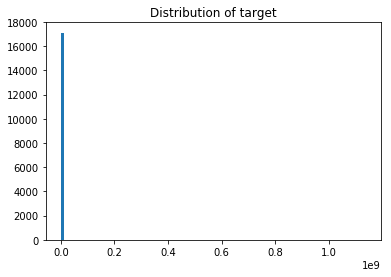

In [699]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.use('agg')
%matplotlib inline

import matplotlib.pyplot as plt
plt.hist(df['exits_diff'], bins = 100)
plt.title('Distribution of target')
plt.show()

### Remove values larger than 8000

In [700]:
np.sum(df['exits_diff'] > 8000)
df = df.loc[df['exits_diff'] < 8000, :]

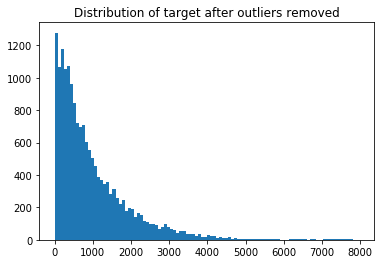

In [701]:
plt.hist(df['exits_diff'], bins = 100)
plt.title('Distribution of target after outliers removed')
plt.show()

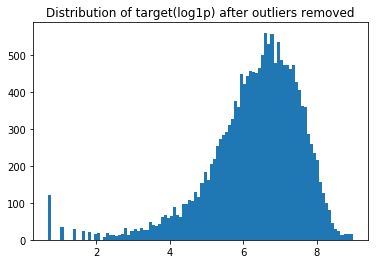

In [730]:
plt.hist(np.log1p(df['exits_diff']), bins = 100)
plt.title('Distribution of target(log1p) after outliers removed')
plt.show()

### Split df into train and validation sets - now we have the data ready!

In [702]:
train = df.loc[df.index < pd.to_datetime('2017-08-08'), :]
test = df.loc[df.index >= pd.to_datetime('2017-08-08'), :]
print("Train, test shapes: ", train.shape, test.shape)

Train, test shapes:  (14934, 126) (2153, 126)


### 4) Modeling - using Random Forest in scikit-learn

In [706]:
y_train = train['exits_diff'].values
y_test = test['exits_diff'].values

del train['exits_diff']
del test['exits_diff']

X_train = train.values
X_test = test.values 

### - Training

In [723]:
from sklearn.ensemble import RandomForestRegressor

best_depth = None
best_depth_mse = 10
print("Tuning depth")
for depth in [9,10,11,12,13,14,15,16,17,20]:
    clf = RandomForestRegressor(max_depth=depth, n_estimators=100, max_features = 'sqrt')
    clf.fit(X_train, np.log1p(y_train))
    y_preds = clf.predict(X_test)
    val_mse = np.mean((y_preds - np.log1p(y_test))**2)
    if val_mse < best_depth_mse:
        best_depth_mse = val_mse
        best_depth = depth
    print("Depth: {}, mse: {}".format(depth, val_mse))
print("Best depth is: ", best_depth)
    
best_ntrees = None
best_ntrees_mse = 10
print("\nTuning num of trees")
for n_trees in [10,20,50,100,200, 400, 500]:
    clf = RandomForestRegressor(max_depth=best_depth, n_estimators=n_trees, max_features = 'sqrt')
    clf.fit(X_train, np.log1p(y_train))
    y_preds = clf.predict(X_test)
    val_mse = np.mean((y_preds - np.log1p(y_test))**2)
    if val_mse < best_ntrees_mse:
        best_ntrees_mse = val_mse
        best_ntrees = n_trees
    print("Depth: {}, mse: {}".format(n_trees, val_mse))
print("Best ntrees is: ", best_ntrees)


Tuning depth
Depth: 9, mse: 1.1574427895952868
Depth: 10, mse: 1.0814661151853233
Depth: 11, mse: 1.04058222117659
Depth: 12, mse: 0.9701481700043326
Depth: 13, mse: 0.8958947139263036
Depth: 14, mse: 0.8448704886988454
Depth: 15, mse: 0.7852107881122514
Depth: 16, mse: 0.7128092793248161
Depth: 17, mse: 0.6588965180889926
Depth: 20, mse: 0.550757009321717
Best depth is:  20

Tuning num of trees
Depth: 10, mse: 0.7579183582790726
Depth: 20, mse: 0.5320828655236398
Depth: 50, mse: 0.5649606282433794
Depth: 100, mse: 0.5756496429444189
Depth: 200, mse: 0.5206065399114654
Depth: 400, mse: 0.540313285369665
Depth: 500, mse: 0.5457492803653339
Best ntrees is:  0.520606539911


### - Validation

In [729]:
clf = RandomForestRegressor(max_depth=best_depth, n_estimators=best_ntrees, max_features = 'sqrt')
clf.fit(X_train, np.log1p(y_train))
y_preds = clf.predict(X_test)

print('Mean squared log error for validation data set: ', np.mean((y_preds - np.log1p(y_test))**2))

Mean squared log error for validation data set:  0.558423366018
Mean squared error for validation data set:  766186.769432


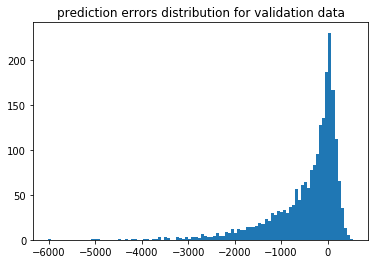

In [732]:
errors = (np.exp(y_preds) - 1 - y_test)
plt.hist(errors, bins = 100)
plt.title('prediction errors distribution for validation data')
plt.show()

## Conclusion
### Above shown is a simple and straight-forward approach to build a predictive modeling for exists count. As shown in the param selection process, the deeper the trees, the better the validation results. This is explained by the fact that higher model complexity improves RF's ability to learn & memorize the inter-connected features relationship down to individual turnstile level. 
### From the error distribution graph above, we also noticed that our model tends to under-predict for larger values. This is because there are outliers in the data sets that has much higher values than others, and mean square error tend to optimize for the mean. 
### Future works and improvements: 
### 1. Explore other models such as xgboost, neural nets, extra trees, etc. 
### 2. Use ensembling or stacking approach. Ensemble tends to give significant improvement than individual models, thus used as default strategy for most Kaggle winning solutions. 
### 3. Explore and add more feature engineerings. This study has demonstrated a basic feature engineering strategy. More advanced features such as 2- or 3-level interaction, representation learning using unsupervised appraoch, cross-validation prediction features, historical data aggregation features, etc. should be explored further and added into the modeling pipeline. 
